📌 Para poder solucionar los ejercicios de hoy no solo tendremos que visualizar, también tendremos que usar métodos que hemos aprendido en lecciones anteriores de Pandas como por ejemplo value_counts(), isnull, describe, etc.

Tendréis que realizar gráficas para contestar a las siguientes preguntas:

1. ¿Cuál es la frecuencia de cada una de las categorías de la columna sex?

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [3]:
df = pd.read_csv('attacks_modificado.csv')
df.head()

,case_number,unnamed:_0,year,type,country,area,location,activity,name,sex_,age,time,species_,href
0,2018.06.25,0,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...
1,2018.06.18,1,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,14h00 -15h00,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...
2,2018.06.09,2,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,07h45,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...
3,2018.06.08,3,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,NaN,2 m shark,http://sharkattackfile.net/spreadsheets/pdf_di...
4,2018.06.04,4,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,NaN,"Tiger shark, 3m",http://sharkattackfile.net/spreadsheets/pdf_di...


In [4]:
serie_cuentas = df['sex_'].value_counts()

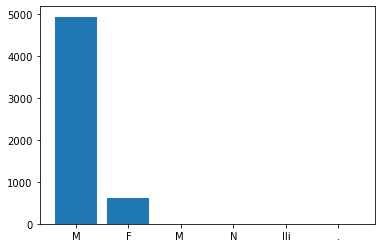

In [5]:
#creamos el grafico
x = serie_cuentas.index
y = serie_cuentas.values

plt.figure()

plt.bar(x,y)

plt.show()

2. ¿Cuál es el porcentaje de nulos por columna? Usa un pie chart donde incluyáis el porcentaje de cada variable en el interior del quesito. Para eso tendréis que usar el parámetro autopct

In [6]:
y1 = df.isnull().sum().index

In [7]:
x1 = df.isnull().sum().values

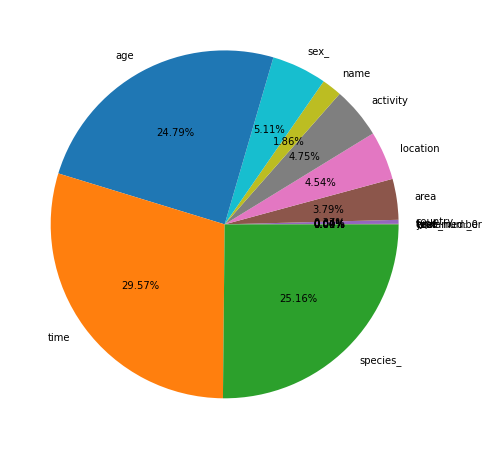

In [9]:
# Con el código más sencillo de los apuntes

plt.figure()
plt.pie(x1, labels=y1, autopct = '%1.2f%%')
plt.show()

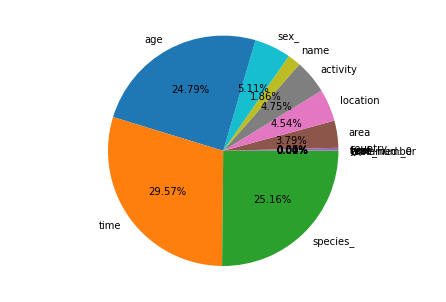

In [ ]:
# Probando el codigo que ofrece la documentación, los resultados son muy similares
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(x1, labels = y1,autopct='%1.2f%%')
plt.show()

In [ ]:
# ver si podemos eliminar la superposicion de labels o eliminar los nulos de la serie serie[serie == 0] --> hacer un drop de esto

3. ¿Cuál es el número total de valores únicos de cada una de las columnas categóricas del DataFrame?

In [13]:
columnas = df.columns

In [11]:
df.describe(include ='object').T

,count,unique,top,freq
case_number,6113,6113,2018.06.25,1
type,6110,8,Unprovoked,4438
country,6074,201,USA,2200
area,5706,791,Florida,1025
location,5626,4020,"New Smyrna Beach, Volusia County",162
activity,5603,1484,Surfing,966
name,5914,5118,male,511
sex_,5564,6,M,4939
age,3448,156,17,154
time,2934,366,Afternoon,183


In [14]:
# este intento habria que afinarlo, es mejor coger la columna unique del dataframe describe()

uniques = []
for column in columnas:
    v = df[column].value_counts().values
    uniques.append(v)

uniques

[array([1, 1, 1, ..., 1, 1, 1]),
 array([1, 1, 1, ..., 1, 1, 1]),
 array([143, 136, 130, 128, 126, 122, 121, 119, 116, 112, 102, 102, 101,
         97,  93,  93,  92,  92,  92,  88,  85,  78,  76,  66,  66,  65,
         61,  61,  57,  57,  56,  56,  56,  55,  54,  53,  53,  51,  51,
         49,  49,  49,  48,  47,  43,  43,  42,  42,  41,  41,  41,  40,
         39,  39,  38,  38,  38,  37,  37,  36,  35,  35,  34,  32,  32,
         32,  31,  31,  30,  30,  30,  29,  29,  29,  28,  28,  27,  27,
         27,  27,  26,  26,  26,  26,  25,  25,  25,  25,  24,  24,  22,
         22,  21,  21,  21,  21,  21,  20,  20,  19,  19,  18,  18,  18,
         17,  17,  16,  16,  15,  15,  15,  15,  15,  14,  14,  14,  14,
         14,  14,  14,  14,  13,  13,  13,  13,  13,  13,  12,  12,  12,
         12,  12,  11,  11,  11,  11,  11,  10,  10,   9,   9,   9,   9,
          9,   9,   9,   9,   8,   8,   8,   8,   7,   7,   7,   7,   6,
          6,   6,   5,   5,   5,   5,   5,   5,   4,   4, 

In [17]:
dfdescribe = df.describe(include ='object').T
dfdescribe['unique']

case_number    6113
type              8
country         201
area            791
location       4020
activity       1484
name           5118
sex_              6
age             156
time            366
species_       1529
href           6099
Name: unique, dtype: object

4. Filtrad los datos para quedarnos solo con los datos de USA.


In [18]:
usa = df[df['country'] == 'USA']

* ¿Cuántos ataques de tiburones hubo en USA a lo largo del tiempo? Muestra solo los que hayan ocurrido del 2000 en adelante.

In [19]:
usa2000 = usa[usa['year']>= 2000]

* En función del tipo, ¿cuántos ataques de tiburones de cada tipo hubo en USA? Muestra los resultados en un gráfico de línea.

In [20]:
usa2000['type'].value_counts()

Unprovoked      843
Invalid          68
Provoked         61
Boating          32
Boat              5
Sea Disaster      2
Name: type, dtype: int64

5. Filtrad los datos para Spain:

In [21]:
spain = df[df['country'] == 'SPAIN']

* ¿Cuántos ataques de tiburones hubo en España a lo largo del tiempo? Muestra solo los que hayan ocurrido del 2000 en adelante.

In [22]:
spain2000 = spain[spain['year']>=2000]

* En función del tipo, ¿cuántos ataques de cada tipo de tiburones hubo en España? Muestra los resultados en un gráfico de línea.

In [23]:
spain2000['type'].value_counts()

Unprovoked    9
Invalid       5
Provoked      2
Name: type, dtype: int64